In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
A = pd.read_csv("../data/processed/A_returns.csv")

1. Check for Stationary

In [ ]:
A['Date'] = pd.to_datetime(A['Date'])
A.set_index('Date', inplace = True)

In [20]:
returns = A['A'].dropna()
result = adfuller(returns)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -19.115000184909754
p-value: 0.0


P-value is 0.0 < 0.5 which mean the timeseries is stationary

In [21]:
stepwise_fit = auto_arima(returns,
                          start_p=0, start_q=0,
                          max_p=5, max_q=5,
                          seasonal=False,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          information_criterion='aic')

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-13431.765, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-13445.281, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-13444.279, Time=0.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-13445.725, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-13443.725, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-13443.724, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13444.489, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-13441.722, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-13447.901, Time=0.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13447.725, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-13445.906, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-13445.894, Time=0.42 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-13446.865, Time=0.85 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-13443.916, Time=1.58 sec

Best

In [25]:
train_size = int(len(returns) * 0.8)
train, test = returns[:train_size], returns[train_size:]

In [26]:
model = ARIMA(train, order=stepwise_fit.order)
model_fit = model.fit()
print(model_fit.summary())

c:\Users\ngoph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ngoph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ngoph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                 2012
Model:                 ARIMA(2, 0, 0)   Log Likelihood                5381.308
Date:                Wed, 06 Aug 2025   AIC                         -10754.616
Time:                        14:43:26   BIC                         -10732.188
Sample:                             0   HQIC                        -10746.383
                               - 2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      2.294      0.022       0.000       0.002
ar.L1         -0.0959      0.015     -6.234      0.000      -0.126      -0.066
ar.L2          0.0325      0.015      2.201      0.0

In [27]:
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

c:\Users\ngoph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ngoph\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [29]:
forecast

Date
2022-12-30   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
2023-01-06   NaN
              ..
2024-12-24   NaN
2024-12-26   NaN
2024-12-27   NaN
2024-12-30   NaN
2024-12-31   NaN
Name: predicted_mean, Length: 503, dtype: float64

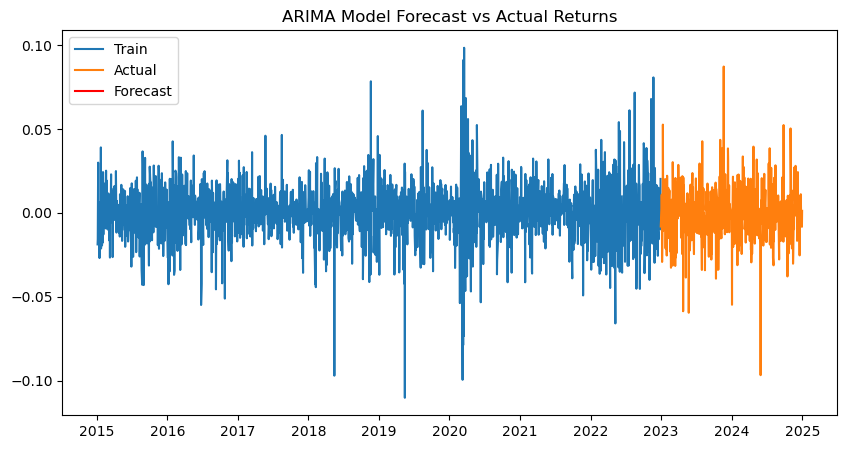

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Model Forecast vs Actual Returns')
plt.show()